### An algorithm to find both red and yellow color in the image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# a function to reduce the noise in the image
def reduce_noise(img):
    # clean up
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    mask_red_closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    mask_red_closed_then_opened = cv2.morphologyEx(mask_red_closed, cv2.MORPH_OPEN, kernel)
    return mask_red_closed_then_opened

In [3]:
# function to get the centroid of the image
def get_centroid(img):
    M = cv2.moments(img)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        return cx, cy
    else:
        return 0, 0

In [20]:
# a function to get the biggest contour and return a mask of that contour
def get_biggest_contour(img):
    # get the contours
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # check if there is any contour
    if len(contours) != 0:
        # get the biggest contour
        biggest_contour = max(contours, key=cv2.contourArea)
        # create a mask of the biggest contour
        mask = np.zeros(img.shape, np.uint8)
        cv2.drawContours(mask, [biggest_contour], 0, 255, -1)
    else:
        mask = img
    return mask

In [21]:
# function to detect bell pepper
def detect_bell_pepper(img):
    center = []
    # blur the image
    blur = cv2.GaussianBlur(img, (7, 7), 0)
    # convert to HSV color space
    hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)
    
    # start with red color mask
    min_red = np.array([170, 100, 80])
    max_red = np.array([180, 256, 256])
    # Threshold the HSV image to get only yellow colors
    mask_red = cv2.inRange(hsv, min_red, max_red)
    # reduce noise
    mask_clean = reduce_noise(mask_red)
    # get the mask of the biggest contour
    mask_biggest_contour = get_biggest_contour(mask_clean)
    # get the centroid of the biggest contour
    cx, cy = get_centroid(mask_biggest_contour)
    # if the centroid is not (0,0) then append it to the center list
    if cx != 0 and cy != 0:
        center.append((cx, cy))
    # draw the centroid
    cv2.circle(img, (cx, cy), 5, (0, 0, 255), -1)

    # now do the same for yellow color
    min_yellow = np.array([10, 150, 150])
    max_yellow = np.array([19, 256, 256])
    # Threshold the HSV image to get only yellow colors
    mask_yellow = cv2.inRange(hsv, min_yellow, max_yellow)
    # reduce noise
    mask_clean = reduce_noise(mask_yellow)
    # get the mask of the biggest contour
    mask_biggest_contour = get_biggest_contour(mask_clean)
    # get the centroid of the biggest contour
    cx, cy = get_centroid(mask_biggest_contour)
    # if the centroid is not (0,0) then append it to the center list
    if cx != 0 and cy != 0:
        center.append((cx, cy))
    # draw the centroid
    cv2.circle(img, (cx, cy), 5, (0, 0, 255), -1)

    return center

[(664, 392), (374, 282)]


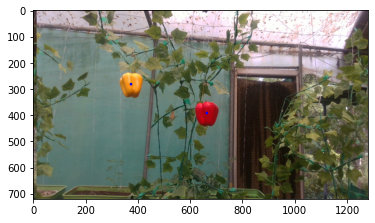

In [24]:
# try the new method
img = cv2.imread('original0.png')

center = detect_bell_pepper(img)
print(center)
plt.imshow(img)
plt.show()

In [11]:
cv2.destroyAllWindows()